Тестовое задание на вакансию: Младший Исследователь данных  (DS) / стажер
==
***

### Подготовка библиботек


In [405]:
### ИМПОРТ БИБЛИОТЕК:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.stats as stats 
import seaborn as sns

### Matplotlib Inline "magic" -------------------
%matplotlib inline

## Работа с данными:   
***

## Импорт данных

In [406]:
### ИМПОРТ ДАНННЫХ:
data_path = "./data/М.Тех_Данные_к_ТЗ_DS.csv"

#Кодировка 'cp1251' позволяет отображать Кириллицу (в dataset'е используется кириллица)
df = pd.read_csv(data_path, encoding='cp1251', sep=',', quoting=3)

In [407]:
df.head()

,"""Количество больничных дней","""""Возраст""""","""""Пол"""""""
0,"""5",39,"""""Ж"""""""
1,"""4",54,"""""М"""""""
2,"""4",26,"""""М"""""""
3,"""5",42,"""""М"""""""
4,"""4",29,"""""М"""""""


## Обработка данных и исправление ошибок

In [408]:
### Исправляем ошибки, связанные с кол-вом кавычек в файле при смене кодировки

## Убираем кавычки из названий
row_names = {'"Количество больничных дней':'Количество больничных дней',
             '""Возраст""':'Возраст',
             '""Пол"""':'Пол'}
df.rename(columns = row_names, inplace = True)

## Убираем кавычки из значений
df["Пол"].replace(r'(\")', r"", regex=True, inplace=True)
df["Количество больничных дней"].replace(r'(\")', r"", regex=True, inplace=True)
df.head(1)


,Количество больничных дней,Возраст,Пол
0,5,39,Ж


In [409]:
### Выводим общую информацию о dataset'е:
print ("Кол-во обьектов  : " , df.shape[0])
print ("Кол-во признаков : " , df.shape[1])
print ("\nПризнаки : \n", df.columns.tolist())
print ("\nПропущенные значения :  ", df.isnull().sum().values.sum())
print ("\n      Уникальные значения :  \n", df.nunique())
print ("\nУникальные значения категориальной переменной Пол:", df["Пол"].unique())
print("\n       Типизация колонок :  \n", df.dtypes)

Кол-во обьектов  :  237
Кол-во признаков :  3

Признаки : 
 ['Количество больничных дней', 'Возраст', 'Пол']

Пропущенные значения :   0

      Уникальные значения :  
 Количество больничных дней     9
Возраст                       35
Пол                            2
dtype: int64

Уникальные значения категориальной переменной Пол: ['Ж' 'М']

       Типизация колонок :  
 Количество больничных дней    object
Возраст                        int64
Пол                           object
dtype: object


In [410]:
### Выставляем корректную типизацию у колонки "Количество больничных дней" dataframe'а:
df["Количество больничных дней"] = df["Количество больничных дней"].astype("int64")
df.dtypes

Количество больничных дней     int64
Возраст                        int64
Пол                           object
dtype: object

In [411]:
### Приводим все целочисленные признаки в целые числа:
df["Количество больничных дней"] = pd.to_numeric(df["Количество больничных дней"], errors='coerce')
df["Возраст"] = pd.to_numeric(df["Возраст"], errors='coerce')

Мы удостоверились, что в нашем датасете:
+ Нет пропущенных значений
+ Корректная типипзация (Категориальные: ***Пол***, Целочисленные: ***Возраст***, ***Количество больничных дней***)
+ В колонке пол представленно только два уникальных значения (М, Ж)
+ Правильно отображены данныe при кодировке "cp1251" - кириллица
+ Тип признака соотвествует типу его значений

In [412]:
### Dataframe:
df.head()

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


## Изучение данных   
***

### Целочисленные признаки:

In [413]:
df.describe()

,Количество больничных дней,Возраст
count,237.000000,237.000000
mean,3.257384,40.181435
std,1.807821,6.875157
min,0.000000,23.000000
25%,2.000000,36.000000
50%,3.000000,41.000000
75%,4.000000,45.000000
max,8.000000,60.000000


Наблюдения:
+ Средний возраст работника в выборке - 40 лет
+ Диапазон возрастов: 23-60 лет
+ В среднем работник получает 3 больничных для в год
+ Медианное значение возраста (41 г.) отличается от среднего (40 лет) - в распределении возрастов есть небольшое смещение вправо

### Категориальные признаки:

In [414]:
df.describe(include='object')

,Пол
count,237
unique,2
top,М
freq,139


In [415]:
df["Пол"].value_counts()

М    139
Ж     98
Name: Пол, dtype: int64

Наблюдения:
+ Мужчин в выборке больше, чем женщин

### Целочисленные признаки (отдельно для каждого пола):

In [416]:
df[df["Пол"] == "М"].describe()

,Количество больничных дней,Возраст
count,139.000000,139.000000
mean,3.179856,39.899281
std,1.889144,6.797586
min,0.000000,23.000000
25%,2.000000,35.000000
50%,3.000000,41.000000
75%,4.000000,44.000000
max,8.000000,57.000000


In [417]:
df[df["Пол"] == "Ж"].describe()

,Количество больничных дней,Возраст
count,98.000000,98.000000
mean,3.367347,40.581633
std,1.689188,6.999151
min,0.000000,23.000000
25%,2.000000,36.000000
50%,3.000000,41.000000
75%,4.000000,45.000000
max,8.000000,60.000000


Наблюдения:
+ Средний возраст Мужчин чуть меньше чем у Женщин, медианное значение неизменно.
+ Стандартное отклонение в распределении кол-ва больничных дней у мужчин чуть больше, чем у женщин
+ В среднем Мужчины пропускают по болезни чуть больше дней, чем женщины (Разница в средних значениях распределений)

## Визуализация данных:   
***

In [418]:
### Разделяем данные на две подгруппы по признаку "Пол"
df_male = df[df["Пол"] == "М"].copy()
df_female = df[df["Пол"] == "Ж"].copy()

df_male.drop(["Пол"], axis="columns", inplace=True)
df_female.drop(["Пол"], axis="columns", inplace=True)

print("Датафрейм с данными о Мужчинах: ", df_male.shape)
print("Датафрейм с данными о Женщинах: ", df_female.shape)

Датафрейм с данными о Мужчинах:  (139, 2)
Датафрейм с данными о Женщинах:  (98, 2)


In [419]:
# def set_box_color(bp, color):
    
#     """ Функция меняет цвет всех элементов Boxplot библиотеки Matplotlib
#     :param bp: обьект Boxplot библиотеки Matplotlib
#     :param color: Цвет
#     """
    
#     plt.setp(bp['boxes'], color=color)
#     plt.setp(bp['whiskers'], color=color)
#     plt.setp(bp['caps'], color=color)
#     plt.setp(bp['medians'], color=color)


# bp_male = plt.boxplot(df_male["Возраст"], positions=1)
# bp_female = plt.boxplot(df_female["Возраст"], positions=2)
# set_box_color(bp_male, '#D7191C')
# set_box_color(bp_female, '#2C7BB6')



# plt.show()

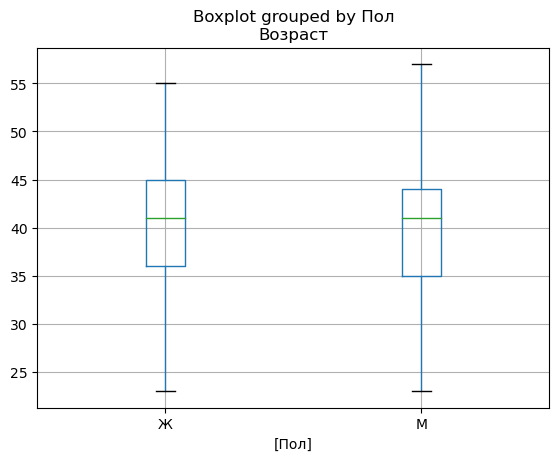

In [420]:
ax = df[["Возраст", "Пол"]].boxplot(by="Пол", showfliers=False)
ax.set_label("Распределение возраста в зависимости от пола")
plt.show()

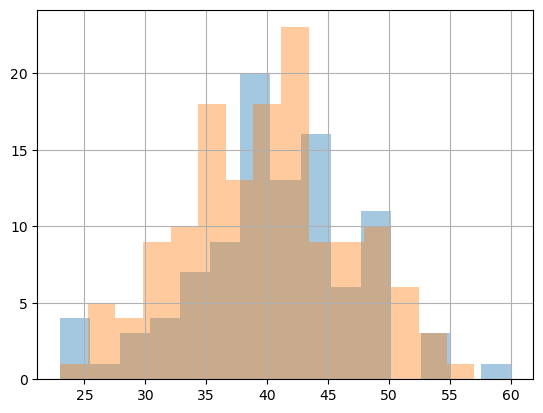

In [421]:
df["Возраст"].groupby(df["Пол"]).hist(bins=15, alpha=0.4)
plt.show()

## Статистическая проверка гипотез (1 задание):   
***

### Формулировка гипотез:   
1. Null Hypothesis $H_0$ - Мужчины пропускают в течение года более 2 рабочих дней по болезни **реже или сопоставимо** женщинам.
2. Alternate Hypothesis $H_a$ - Мужчины пропускают в течение года более 2 рабочих дней по болезни значительно **чаще** женщин.   
### Формальная формулировка гипотез:
1. $H_0: \mu_1 <= \mu_2$   
1. $H_a: \mu_1 > \mu_2$,    
Где: $\mu_1$ - математическое ожидание мужской выборки, $\mu_2$ - математическое ожидание женской выборки
### Определение уровня значимости:   
Определим "стандартный" уровень значимости, равный 5%   
$\alpha$ = 0.05   

### Отделяем выборку по критерию *(Более 2х рабочих дней пропущено)*:

In [422]:
### Убираем тех, кто пропустим 2 или меньше дней по болезни, разделяем по признаку "Пол"
df_more_than_two_days_absent = df[df["Количество больничных дней"] > 2]
df_male_absent = df_more_than_two_days_absent[df_more_than_two_days_absent["Пол"] == "М"]["Количество больничных дней"]
df_female_absent = df_more_than_two_days_absent[df_more_than_two_days_absent["Пол"] == "Ж"]["Количество больничных дней"]

df_male_absent.rename("Мужчины", inplace=True)
df_female_absent.rename("Женщины", inplace=True)
print("Размерность выборки мужчин: ", df_male_absent.shape[0])
print("Размерность выборки женщин: ", df_female_absent.shape[0])

Размерность выборки мужчин:  84
Размерность выборки женщин:  67


### Строим гистограмму плотности распределений выборок

In [423]:
def two_histograms(x, y):
    """
    Функция, строящая две гистограммы плотности по двум выборкам.
    Пунктирные линии - средние значения выборок.
    :param x: выборка pd.Series
    :param y: выборка pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x), bins = np.arange(3, 9))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y), bins = np.arange(3, 9))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle="dashed")
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle="dashed")
    plt.legend([x.name, y.name])
    

def evaluate_p_value(p_value, alpha=0.05) :
    """
    Функция, сравнивающая поданное p_value статистического теста с заданным уровнем значимости
    :param p_value: float - значение p
    :param alpha: float - уровень значимости, по умолочанию - 0.05
    """
    print("p-value: ", p_value)
    if p_value > alpha:
        print("p-значение больше 0.05, значит у нас нет оснований отвергать нулевую гипотезу")
    else:
        print("p-значение меньше или равно 0.05, значит мы имеем право отвергнуть нулевую гипотезу и принять альтернативную")

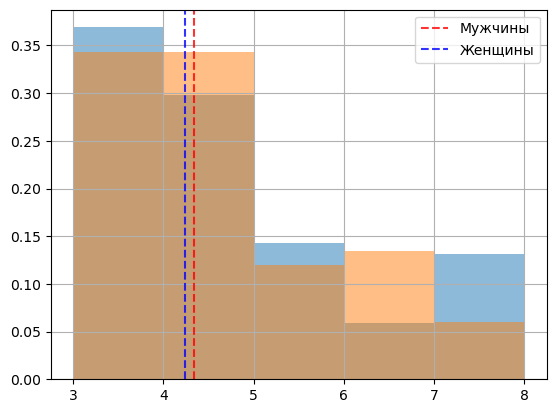

In [424]:
two_histograms(df_male_absent, df_female_absent)

### ~~не~~ Применение критерия Стюдента:

Для применения критерия Стюдента, необходимо проверить, являются ли распределение наших выборок нормальным.   
Для этого я буду использовать тест Шапиро-Уилка для каждой из выборок, указав при этом уровень значимости $\alpha$ =  0.05

Гипотезы для теста Шапиро-уилка:
+ $H_0$: Выборка распределена по нормальному закону.
+ $H_a$: Закон распределения выборки не является нормальным.

In [425]:
### Выполняем тест Шапиро-Уилка для первой выборки (Мужчины)
shapiro_test_results = stats.shapiro(df_male_absent)

evaluate_p_value(shapiro_test_results.pvalue)

p-value:  7.513522248814297e-09
p-значение меньше или равно 0.05, значит мы имеем право отвергнуть нулевую гипотезу и принять альтернативную


In [426]:
### Выполняем тест Шапиро-Уилка для второй выборки (Женищны)
shapiro_test_results = stats.shapiro(df_female_absent)

evaluate_p_value(shapiro_test_results.pvalue)

p-value:  5.730509542445361e-07
p-значение меньше или равно 0.05, значит мы имеем право отвергнуть нулевую гипотезу и принять альтернативную


Наблюдения:   
    Для обоих выборок мы отвергнули гипотезу о том, что данные в них распределены нормально, и приняли гипотезу о том, что   
    данные в них не имеют нормального распределения.
    Следовательно, применение t-test'а **не** будет статистически значимым.

Критерий Стюдента (t-test) не применим для данных выборок, так как распределенние данных выборок сильно разнятся от нормального.   
Следовательно, простое сравнение средних значений не даст нам статистического заключения об их различии.

### Применение критерия Манна-Уитни:

Получается, мы имеет две не связанные между собой выборки, в которых наблюдается серьезное отклонение от нормального распределения. Следовательно, рациональным будет попытка использовать тест Манна-Уитни.

In [427]:
res = stats.mannwhitneyu(df_male_absent, df_female_absent)

evaluate_p_value(res.pvalue)

p-value:  0.9548173130538878
p-значение больше 0.05, значит у нас нет оснований отвергать нулевую гипотезу


Наблюдения:   
p-value получилось много больше, чем заданный изначально уровень значимости, поэтому у нас нет никаких статистических оснований отвергать   
$H_0$-гипотезу о том, что различия между пропусками мужчин и женщшин - нет.

## Формирование вывода (1 задание):   
***

**Вывод:**   
 Определив гипотезы, и проведя тестирование статистической значимости гипотез, я выяснил, что у нас нет оснований отвергать нулевую гипотезу о том, что мужчины **не** пропускают по болезни более 2-х дней значительно больше, чем их коллеги-женщины. Это было подтверждено тестом Манна-Уитни.   
 На основании этого, мы не можем сказать, что мужчины пропускают по болезни больше 2-х дней значительно чаще, чем женщины.

## Статистическая проверка гипотез (2 задание):   
***

### Формулировка гипотез:   
1. Null Hypothesis $H_0$ - Старшие сотрудники (> 35 лет) пропускают в течение года более 2 рабочих дней по болезни **реже или сопоставимо** их более молодым коллегам (<= 35 лет).
2. Alternate Hypothesis $H_a$ - Старшие сотрудники (> 35 лет) пропускают в течение года более 2 рабочих дней по болезни значительно **чаще**, чем их более молодые коллеги (<= 35 лет).   
### Формальная формулировка гипотез:
1. $H_0: \mu_1 <= \mu_2$   
1. $H_a: \mu_1 > \mu_2$,    
Где: $\mu_1$ - математическое ожидание выборки из старших сотрудников, $\mu_2$ - математическое ожидание выборки из молодых сотрудников
### Определение уровня значимости:   
Уровень значимости оставим прежним   
$\alpha$ = 0.05   

In [428]:
### Убираем из совокупности тех, кто пропускал 2 и меньше дней, разбиваем совокупность на две выборки по признаку "Возраст", 35:
df_more_than_two_days_absent = df[df["Количество больничных дней"] > 2]
df_younger = df_more_than_two_days_absent[df_more_than_two_days_absent["Возраст"] > 35]["Количество больничных дней"]
df_older = df_more_than_two_days_absent[df_more_than_two_days_absent["Возраст"] <= 35]["Количество больничных дней"]

df_younger.rename("Младшие", inplace=True)
df_older.rename("Старшие", inplace=True)
print("Размерность выборки младших работников: ", df_younger.shape[0])
print("Размерность выборки старших работников: ", df_older.shape[0])

Размерность выборки младших работников:  115
Размерность выборки старших работников:  36


### Строим гистограмму плотности распределений выборок

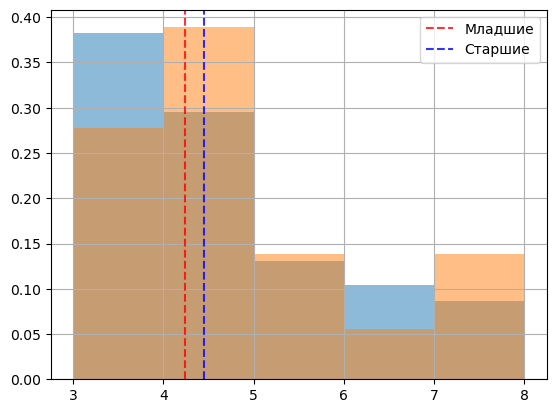

In [429]:
two_histograms(df_younger, df_older)

### ~~снова не~~ Применение критерия Стюдента:

Аналогично первому заданию, визуально распределения выборок отличны от нормального, и для проверки этого я выполню тест Шапиро-Уилка, показывающий, является ли статистически значимым или не значимым отклонение распределений от нормального.

Гипотезы для теста Шапиро-Уилка:
+ $H_0$: Выборка распределена по нормальному закону.
+ $H_a$: Закон распределения выборки не является нормальным.

In [431]:
### Проводим тест Шапиро-Уилка для выборки из молодых сотрудников
shapiro_test_results = stats.shapiro(df_younger)

evaluate_p_value(shapiro_test_results.pvalue)

p-value:  2.490216088890662e-10
p-значение меньше или равно 0.05, значит мы имеем право отвергнуть нулевую гипотезу и принять альтернативную


In [432]:
### Проводим тест Шапиро-Уилка для выборки из старших сотрудников
shapiro_test_results = stats.shapiro(df_older)

evaluate_p_value(shapiro_test_results.pvalue)

p-value:  5.530375710804947e-05
p-значение меньше или равно 0.05, значит мы имеем право отвергнуть нулевую гипотезу и принять альтернативную


Наблюдения:   
Как и в случае выборок в первом задании, в данных обоих выборках p-значение низкое, и мы отвергаем гипотезу о том, что их распределения нормальные или близки к нормальным. Соответственно, применения t-test'а, аналогично первому заданию, будет статистически **не** значимо.

### Применение критерия Манна-Уитни:

Так как мы имеем две несвязанные выборки, которые не распределены нормально, мы можем применить тест Манна-Уитни.

In [434]:
res = stats.mannwhitneyu(df_younger, df_older)

evaluate_p_value(res.pvalue)

p-value:  0.408297183958816
p-значение больше 0.05, значит у нас нет оснований отвергать нулевую гипотезу


Наблюдения:   
p-значения в этот раз меньше, чем в первом задании, но все равно оно недостаточно низко, чтобы у нас появились основания отвергнуть нулевую гипотезу. 

## Формирование вывода (2 задание):   
***

**Вывод**:   
Как и в случае с разделением выборок по полу, разделив совокупность на выборки по возрасту, проведя тестирование статистической значимости различий (тест Манна-Уитни, т.к. распределения в выборках отличны от нормального), мы получаем результат, который не дает нам оснований отвергать гипотезу о том, что более старшие сотрудники (возраст > 35 лет) **не** пропускают по болезни более 2-х дней значительно чаще, чем их молодые коллеги. Соответственно, мы не имеем оснований сказать, что Старшие сотрудники пропускают более 2-х дней по болезни значительно чаще, чем их молодые коллеги.